In [1]:
%run 'Functions.ipynb'

In [2]:
client = Elasticsearch()

In [3]:
ids = [e.meta.id for e in Search(index='hep-recent').fields(['_id']).scan()]

In [4]:
len(ids)

99999

In [5]:
def term_vectors(ids, field):
    res = client.mtermvectors(
        index='hep-analysis', 
        doc_type='hep',
        ids=ids,
        fields=[field],
        field_statistics=False,
        term_statistics=True,
        offsets=False,
        payloads=False,
        positions=False
    )
    return [e['term_vectors'][field]['terms'] for e in res['docs'] if field in e['term_vectors']]

In [6]:
res = term_vectors(ids[0:100], 'abstracts.value')

In [7]:
word_freq = {}

In [8]:
for i in range(0, 100):
    vectors = term_vectors(ids[100 * i:100 * i + 100], 'abstracts.value')
    for vec in vectors:
        for word, freq in vec.items():
            if word not in word_freq:
                word_freq[word] = freq['ttf']

In [9]:
len(word_freq)

606829

In [10]:
word_freq

{'case angle': 2,
 'whole rest mass': 1,
 'entanglement entropy satisfy': 3,
 'nn scatter': 8,
 'aia board': 3,
 'witten partition function': 1,
 'data furthermore central': 1,
 'planetary protector': 3,
 'drive hydrodynamic': 4,
 'ghz': 2809,
 'optical thin nonthermal': 1,
 'existence helic': 2,
 'high energy model': 2,
 'admit various': 3,
 'survey evolve': 1,
 'can trace different': 2,
 'propto lambdal': 1,
 'apply construction': 2,
 'absorb towards quasar': 1,
 'mmlmn': 16672,
 'infinity category': 3,
 'scatter excite function': 1,
 'direct gravitation analogue': 1,
 'elongate decrease': 1,
 'alpha elements directly': 1,
 'cosmology perturbation': 209,
 'detect nuclear hei': 1,
 'usual taylor series': 2,
 'found significant': 38,
 'sio temperature': 1,
 'locally thermodynamic stable': 1,
 'two decade': 69,
 'flared disk continuum': 1,
 'get destabilize': 8,
 'precision cosmology': 50,
 'dnl equation numerical': 1,
 'production ep': 3,
 'better long term': 1,
 'non ideal': 22,
 'mil

In [11]:
sorted(word_freq.items(), key=lambda x: -x[1])

[('model', 53570),
 ('use', 45261),
 ('result', 37965),
 ('show', 33273),
 ('mmlmi', 30960),
 ('present', 28955),
 ('study', 28790),
 ('energy', 27955),
 ('find', 27456),
 ('can', 27035),
 ('mass', 25819),
 ('field', 25337),
 ('theory', 24478),
 ('data', 22741),
 ('two', 21410),
 ('also', 21275),
 ('large', 19463),
 ('obtain', 19364),
 ('system', 19122),
 ('one', 19026),
 ('galaxy', 18732),
 ('case', 18395),
 ('well', 18149),
 ('function', 18107),
 ('parameter', 16940),
 ('found', 16887),
 ('mmlmn', 16672),
 ('order', 16260),
 ('discuss', 15980),
 ('inline', 15969),
 ('observe', 15700),
 ('high', 15584),
 ('measurement', 15366),
 ('ray', 15117),
 ('formula', 15077),
 ('decay', 14897),
 ('investigate', 14580),
 ('time', 14571),
 ('base', 14459),
 ('compare', 14427),
 ('gev', 14367),
 ('paper', 14338),
 ('inline formula', 14041),
 ('value', 14011),
 ('particle', 14010),
 ('equation', 13864),
 ('solution', 13797),
 ('new', 13564),
 ('scale', 13554),
 ('analysis', 13287),
 ('source', 12915

In [12]:
word_freq['higg']

7185

In [13]:
from wordcloud import WordCloud

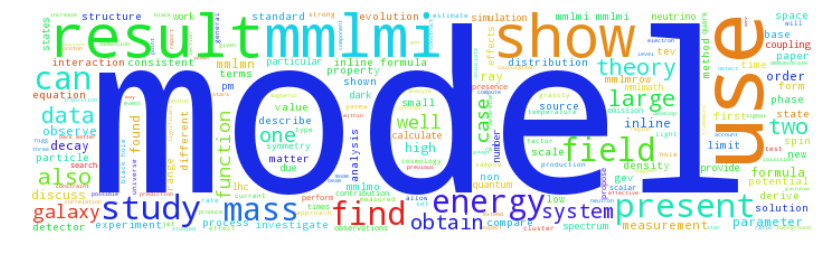

In [14]:
plt.axis("off")
plt.imshow(WordCloud(width=700, background_color='white').generate_from_frequencies(word_freq.items()))